In [4]:
import sys
sys.path.append("../")

In [5]:
from core import RotateStructure
from utils import create_spehircal_mesh_points

In [6]:
rs=RotateStructure()
structure=rs.get_rotated_structure(phi=0, theta=180, remove_Rb=False, add_charge=False)
from chgnet.model.model import CHGNet

chgnet = CHGNet.load()
prediction = chgnet.predict_structure(structure)

for key, unit in [
    ("energy", "eV/atom"),
    ("forces", "eV/A"),
    ("stress", "GPa"),
    ("magmom", "mu_B"),
]:
    print(f"CHGNet-predicted {key} ({unit}):\n{prediction[key[0]]}\n")

CHGNet initialized with 400,438 parameters
CHGNet-predicted energy (eV/atom):
-3.807814836502075

CHGNet-predicted forces (eV/A):
[[ 8.0171275e-01 -4.1298335e-07 -1.1653512e+00]
 [-4.1915780e-01  2.3096800e-07 -6.2662649e-01]
 [-1.5181273e-01 -5.9839513e-06  4.4167089e-01]
 [ 2.4541354e-01  1.0228250e-06  1.5886366e-01]
 [-3.4968488e-02 -1.8866224e-07  2.0514484e-02]
 [-3.5106741e-02  9.0423924e-08  1.5260831e-01]
 [-2.3615505e-01  7.4894524e-01  3.0093718e-01]
 [ 3.3115622e-02 -1.4040378e-01  2.0821950e-01]
 [-2.3615642e-01 -7.4893916e-01  3.0094478e-01]
 [ 3.3115432e-02  1.4040294e-01  2.0821908e-01]]

CHGNet-predicted stress (GPa):
[[-8.2046127e-01 -7.7447135e-07  9.7053230e-02]
 [-8.1033630e-07 -1.7355952e+00  7.5969024e-06]
 [ 9.7053453e-02  7.7931181e-06 -2.6250625e+00]]

CHGNet-predicted magmom (mu_B):
[0.00100674 0.00317599 0.0058442  0.0052848  0.00872609 0.0083292
 0.00653235 0.00878301 0.00653201 0.00878301]



In [7]:
nk=20
t,p=create_spehircal_mesh_points(nk)

In [10]:
import numpy as np
from tqdm import tqdm as tqdm
prediction=np.zeros((len(t),len(p)),dtype=object)
for i,theta in tqdm(enumerate(t)):
    for j,phi in enumerate(p):
        structure=rs.get_rotated_structure(phi=phi, theta=theta, remove_Rb=False, add_charge=False)
        prediction[i][j]=chgnet.predict_structure(structure)

20it [00:05,  3.95it/s]


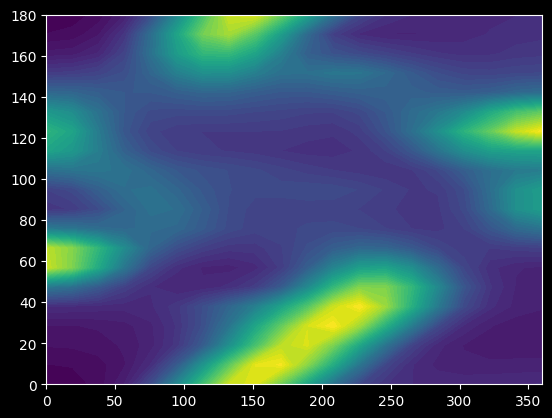

In [11]:
import matplotlib.pyplot as plt
E=np.vectorize(lambda x:x['e'])(prediction)
plt.contourf(t,p,E,50)

In [18]:
data={0.0:[-25817.651985, 3.59662],
20.0:[-25817.6519622, 3.60272],
40.0:[-25817.6514051, 3.5833],
60.0:[-25817.6516298, 3.6026],
80.0:[-25817.6371833, 3.39987],
100.0:[-25817.5815433, 3.22884],
120.0:[-25817.54092366, 2.44018],
140.0:[-25817.5431785, 2.467],
160.0:[-25817.6212143, 2.5132],
180.0:[-25817.6438885, 2.50503],
220.0:[-25817.6157228, 2.97102],
240.0:[-25817.6005773, 3.01634],
260.0:[-25817.6101179, 2.98198]}
x=np.array(list(data.keys()))
y=np.array(list(data.values()))[:,0]
y=(y-np.min(y))*13.6056980659 
y1=np.array(list(data.values()))[:,1]

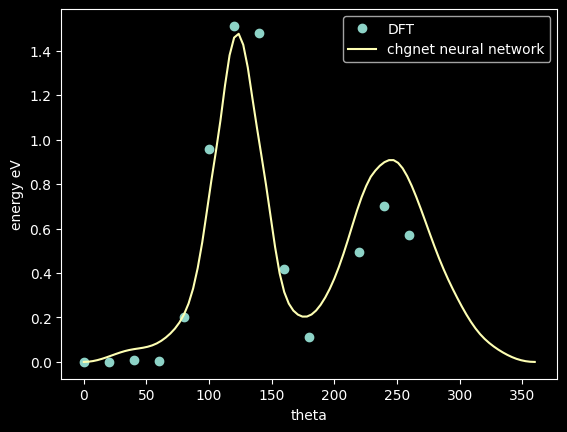

In [21]:
nk=100
t,p=create_spehircal_mesh_points(nk)
p_e=[]
for j,theta in enumerate(t):
    structure=rs.get_rotated_structure(phi=0, theta=theta, remove_Rb=False, add_charge=False)
    p_e.append(chgnet.predict_structure(structure)['e'])
p_e=np.array(p_e)
plt.plot(x, y, 'o', label='DFT')
plt.plot(t,(p_e-np.min(p_e))*2 ,label='chgnet neural network')
plt.xlabel('theta')
plt.ylabel('energy eV')
plt.legend()
plt.show()

## Simple MD

In [51]:
from chgnet.model.model import CHGNet
from chgnet.model.dynamics import MolecularDynamics
from pymatgen.core import Structure
import warnings

warnings.filterwarnings("ignore", module="pymatgen")
warnings.filterwarnings("ignore", module="ase")

def get_structure(theta):
    rs = RotateStructure()
    return rs.get_rotated_structure(phi=0, theta=theta, remove_Rb=False, add_charge=False)

chgnet = CHGNet.load()


CHGNet initialized with 400,438 parameters


In [57]:
temperatures = range(100, 2000, 100)  # Example range from 100K to 2000K in steps of 100K
structures = [0, 180]  # Two structures corresponding to theta=0 and theta=180

for temp in temperatures:
    for theta in structures:
        structure = get_structure(theta)
        
        md = MolecularDynamics(
            atoms=structure,
            model=chgnet,
            ensemble="nvt",
            temperature=temp,  # Varying temperature
            timestep=10,  # in femto-seconds
            trajectory=f"../data/md_files/md_out_theta_{theta}_T_{temp}.traj",
            logfile=f"../data/md_files/md_out_theta_{theta}_T_{temp}.log",
            loginterval=100,
            use_device="cpu",  # use 'cuda' for faster MD if available
        )
        md.run(50)  # run a 0.1 ps MD simulation


CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu


In [58]:
from ase.io import read

def extract_average_energy(trajectory_filename):
    traj = read(trajectory_filename, ':')  # Read the entire trajectory
    energies = [atom.get_potential_energy() for atom in traj]
    return sum(energies) / len(energies)


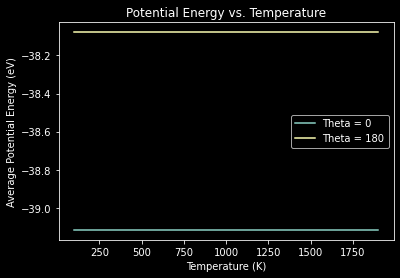

In [59]:
import matplotlib.pyplot as plt

temperatures = range(100, 2000, 100)  # Example range from 100K to 2000K in steps of 100K
structures = [0, 180]  # Two structures corresponding to theta=0 and theta=180
energies_dict = {theta: [] for theta in structures}

for temp in temperatures:
    for theta in structures:
        traj_file = f"../data/md_files/md_out_theta_{theta}_T_{temp}.traj"
        avg_energy = extract_average_energy(traj_file)
        energies_dict[theta].append(avg_energy)

# Plotting
for theta, energies in energies_dict.items():
    plt.plot(temperatures, energies, label=f'Theta = {theta}')
    
plt.xlabel('Temperature (K)')
plt.ylabel('Average Potential Energy (eV)')
plt.legend()
plt.title('Potential Energy vs. Temperature')
plt.show()


CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will

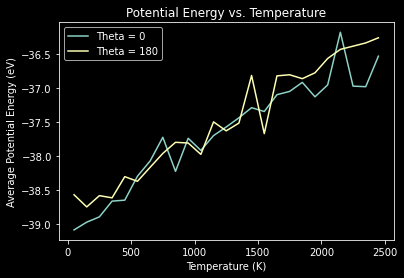

In [63]:
from ase.io import read
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.io.ase import AseAtomsAdaptor

def get_structure_as_ase(theta):
    structure = get_structure(theta)
    ase_adaptor = AseAtomsAdaptor()
    return ase_adaptor.get_atoms(structure)


def extract_average_energy(trajectory_filename):
    traj = read(trajectory_filename, ':')  # Read the entire trajectory
    energies = [atom.get_potential_energy() for atom in traj]
    return sum(energies) / len(energies)

def introduce_perturbation(structure, magnitude=0.01):
    """Randomly perturb atomic positions by a given magnitude."""
    for atom in structure:
        displacement = np.random.uniform(-magnitude, magnitude, 3)
        atom.position += displacement
    return structure

# Prepare structures
structures = [0, 180]
get_structure_functions = {
    theta: introduce_perturbation(get_structure_as_ase(theta))
    for theta in structures
}

# Wider temperature range
temperatures = range(50, 2500, 100)  # Extended range from 50K to 2500K

energies_dict = {theta: [] for theta in structures}

for temp in temperatures:
    for theta, get_structure_func in get_structure_functions.items():
        structure = get_structure_func
        
        md = MolecularDynamics(
            atoms=structure,
            model=chgnet,
            ensemble="nvt",
            temperature=temp,
            timestep=2,
            trajectory=f"../data/md_files/md_out_theta_{theta}_T_{temp}.traj",
            logfile=f"../data/md_files/md_out_theta_{theta}_T_{temp}.log",
            loginterval=100,
            use_device="cpu",
        )
        
        # Longer simulations: Run for 0.5 ps instead of 0.1 ps
        md.run(250)
        
        avg_energy = extract_average_energy(f"../data/md_files/md_out_theta_{theta}_T_{temp}.traj")
        energies_dict[theta].append(avg_energy)

# Plotting
for theta, energies in energies_dict.items():
    plt.plot(temperatures, energies, label=f'Theta = {theta}')
    
plt.xlabel('Temperature (K)')
plt.ylabel('Average Potential Energy (eV)')
plt.legend()
plt.title('Potential Energy vs. Temperature')
plt.show()


In [71]:
def run_segmented_md(structure, chgnet_model, start_temp, end_temp, segments, timestep, trajectory_base, logfile_base, loginterval, use_device):
    """Run MD in segments with increasing temperature."""
    delta_temp = (end_temp - start_temp) / segments
    current_structure = structure  # Starting structure
    
    for segment in range(segments):
        current_temp = start_temp + delta_temp * segment
        # Create a new MD object with the updated temperature
        md_segment = MolecularDynamics(
            atoms=current_structure,
            model=chgnet_model,
            ensemble="nvt",
            temperature=current_temp,
            timestep=timestep,
            trajectory=f"../data/md_files/{trajectory_base}_segment_{segment}.traj",
            logfile=f"../data/md_files/{logfile_base}_segment_{segment}.log",
            loginterval=loginterval,
            use_device=use_device,
        )
        
        md_segment.run(10)  # Run each segment for a shorter duration
        current_structure = md_segment.atoms  # Update structure for the next segment

for theta, get_structure_func in get_structure_functions.items():
    structure = get_structure_func
        
    # Temperature annealing from 50K to 2500K over 250 segments
    run_segmented_md(
        structure, 
        chgnet, 
        50, 
        2500, 
        250, 
        2, 
        f"md_out_theta_{theta}", 
        f"md_out_theta_{theta}", 
        100, 
        "cpu"
    )


CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will

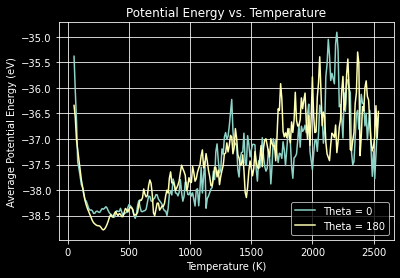

In [80]:
import matplotlib.pyplot as plt

def extract_average_energy_from_segments(trajectory_base, segments):
    energies = []
    for segment in range(segments):
        traj_file = f"../data/md_files/{trajectory_base}_segment_{segment}.traj"
        avg_energy = extract_average_energy(traj_file)
        energies.append(avg_energy)
    return energies

temperatures = [50 + 10 * i for i in range(250)]  # Assuming delta_temp of 10K
structures = [0, 180]

energies_dict = {}
for theta in structures:
    energies = extract_average_energy_from_segments(f"md_out_theta_{theta}", 250)
    energies_dict[theta] = energies
    plt.plot(temperatures, energies, label=f'Theta = {theta}')

plt.xlabel('Temperature (K)')
plt.ylabel('Average Potential Energy (eV)')
plt.legend()
plt.title('Potential Energy vs. Temperature')
plt.grid(True)
plt.show()


In [81]:
import os

def run_segmented_md(structure, chgnet_model, start_temp, end_temp, segments, timestep, trajectory_base, logfile_base, loginterval, use_device):
    """Run MD in segments with increasing temperature."""
    delta_temp = (end_temp - start_temp) / segments
    current_structure = structure  # Starting structure
    
    # Ensure the directory exists
    if not os.path.exists("../data/md_files"):
        os.makedirs("../data/md_files")
    
    for segment in range(segments):
        current_temp = start_temp + delta_temp * segment
        # Create a new MD object with the updated temperature
        md_segment = MolecularDynamics(
            atoms=current_structure,
            model=chgnet_model,
            ensemble="nvt",
            temperature=current_temp,
            timestep=timestep,
            trajectory=f"../data/md_files/{trajectory_base}_segment_{segment}.traj",
            logfile=f"../data/md_files/{logfile_base}_segment_{segment}.log",
            loginterval=loginterval,
            use_device=use_device,
        )
        
        md_segment.run(20)  # Increased run duration for each segment
        current_structure = md_segment.atoms  # Update structure for the next segment

for theta, get_structure_func in get_structure_functions.items():
    structure = get_structure_func
        
    # Temperature annealing from 50K to 2500K over 250 segments
    run_segmented_md(
        structure, 
        chgnet, 
        50, 
        2500, 
        250, 
        2, 
        f"md_out_theta_{theta}", 
        f"md_out_theta_{theta}", 
        100, 
        "cpu"
    )


CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will

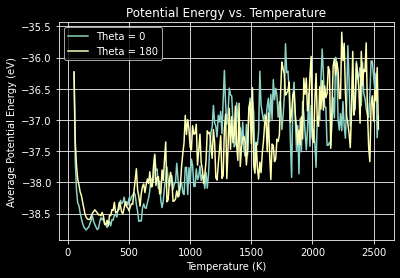

In [82]:
import matplotlib.pyplot as plt

def extract_average_energy_from_segments(trajectory_base, segments):
    energies = []
    for segment in range(segments):
        traj_file = f"../data/md_files/{trajectory_base}_segment_{segment}.traj"
        avg_energy = extract_average_energy(traj_file)
        energies.append(avg_energy)
    return energies

temperatures = [50 + 10 * i for i in range(250)]  # Assuming delta_temp of 10K
structures = [0, 180]

energies_dict = {}
for theta in structures:
    energies = extract_average_energy_from_segments(f"md_out_theta_{theta}", 250)
    energies_dict[theta] = energies
    plt.plot(temperatures, energies, label=f'Theta = {theta}')

plt.xlabel('Temperature (K)')
plt.ylabel('Average Potential Energy (eV)')
plt.legend()
plt.title('Potential Energy vs. Temperature')
plt.grid(True)
plt.show()


CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will

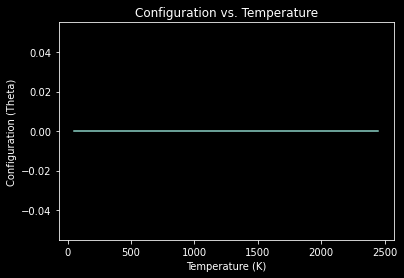

In [88]:
from pymatgen.analysis.structure_matcher import StructureMatcher
from pymatgen.core import Structure

def ase_atoms_to_pymatgen_structure(atoms):
    """Convert ASE Atoms to Pymatgen Structure."""
    return Structure(
        lattice=atoms.cell,
        species=[atom.symbol for atom in atoms],
        coords=[atom.position for atom in atoms],
    )


def create_mixed_configuration(structure0, structure180):
    """
    Creates a mixed configuration by taking half atoms from structure0 and half from structure180.
    """
    num_atoms = len(structure0)
    half_atoms = num_atoms // 2
    
    # Create a new structure object (assuming pymatgen's Structure)
    mixed_structure = Structure(structure0.lattice, 
                                [site.specie for site in structure0[:half_atoms]] + [site.specie for site in structure180[half_atoms:]],
                                [site.coords for site in structure0[:half_atoms]] + [site.coords for site in structure180[half_atoms:]])
    
    return mixed_structure


def is_in_configuration(structure, ref0, ref180):
    """
    Determines if the structure is closer to ref0 or ref180 using RMSD.
    Returns 0 or 180 based on the closer match.
    """
    matcher = StructureMatcher()
    
    # Check if structures match
    match0 = matcher.fit(structure, ref0)
    match180 = matcher.fit(structure, ref180)
    
    if not match0 and not match180:
        # If neither structure matches, use some fallback criteria 
        # (for now, just return 0 as an example)
        return 0
    
    rmsd_0 = matcher.get_rms_dist(structure, ref0) if match0 else float("inf")
    rmsd_180 = matcher.get_rms_dist(structure, ref180) if match180 else float("inf")
    
    return 0 if rmsd_0 < rmsd_180 else 180


def run_md_at_temperature(structure, chgnet_model, temperature, timestep, trajectory_base, logfile_base, loginterval, use_device):
    md = MolecularDynamics(
        atoms=structure,
        model=chgnet_model,
        ensemble="nvt",
        temperature=temperature,
        timestep=timestep,
        trajectory=f"../data/md_files/{trajectory_base}_T_{temperature}.traj",
        logfile=f"../data/md_files/{logfile_base}_T_{temperature}.log",
        loginterval=loginterval,
        use_device=use_device,
    )
    md.run(50)  # Run each simulation for a fixed duration
    return md.atoms

# Creating the mixed configuration
structure0 = get_structure(0)
structure180 = get_structure(180)
mixed_structure = create_mixed_configuration(structure0, structure180)

# Running the MD and analysis
temperatures = range(50, 2500, 50)
configurations = []

for temp in temperatures:
    final_structure_ase = run_md_at_temperature(mixed_structure, chgnet, temp, 2, "md_mixed", "log_mixed", 100, "cpu")
    final_structure_pymatgen = ase_atoms_to_pymatgen_structure(final_structure_ase)
    config = is_in_configuration(final_structure_pymatgen, structure0, structure180)
    configurations.append(config)


# Visualization
plt.plot(temperatures, configurations)
plt.xlabel('Temperature (K)')
plt.ylabel('Configuration (Theta)')
plt.title('Configuration vs. Temperature')
plt.show()


In [93]:
from ase import Atoms
from ase.geometry.analysis import Analysis

def compute_rdf(structure, rmax, n_bins):
    """Compute the RDF for a given structure."""
    # Convert Pymatgen structure to ASE Atoms
    lattice = structure.lattice.matrix
    atoms = Atoms(
        symbols=[site.species_string for site in structure],
        positions=[site.coords for site in structure],
        cell=lattice
    )
    
    analysis = Analysis(atoms)
    rdf = analysis.get_rdf(rmax=rmax, nbins=n_bins)
    r = np.linspace(0, rmax, n_bins)  # Generate the r values separately
    
    return r, rdf





def compare_rdfs(rdf1, rdf2):
    """Compute the difference between two RDFs."""
    return np.sum((rdf1 - rdf2) ** 2)

# Pre-compute RDFs for reference structures
r, rdf0 = compute_rdf(structure0, rmax=10, n_bins=100)
_, rdf180 = compute_rdf(structure180, rmax=10, n_bins=100)



def is_in_configuration_using_rdf(structure):
    """Determine configuration using RDF."""
    _, rdf_mixed = compute_rdf(structure, r_max=10, n_bins=100)
    
    diff0 = compare_rdfs(rdf_mixed, rdf0)
    diff180 = compare_rdfs(rdf_mixed, rdf180)
    
    return 0 if diff0 < diff180 else 180


CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will

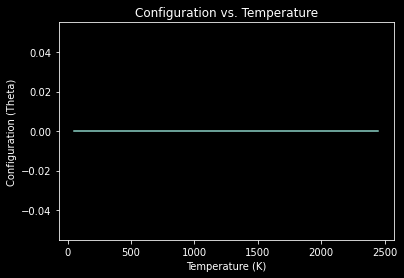

In [94]:


def run_md_at_temperature(structure, chgnet_model, temperature, timestep, trajectory_base, logfile_base, loginterval, use_device):
    md = MolecularDynamics(
        atoms=structure,
        model=chgnet_model,
        ensemble="nvt",
        temperature=temperature,
        timestep=timestep,
        trajectory=f"../data/md_files/{trajectory_base}_T_{temperature}.traj",
        logfile=f"../data/md_files/{logfile_base}_T_{temperature}.log",
        loginterval=loginterval,
        use_device=use_device,
    )
    md.run(50)  # Run each simulation for a fixed duration
    return md.atoms

# Creating the mixed configuration
structure0 = get_structure(0)
structure180 = get_structure(180)
mixed_structure = create_mixed_configuration(structure0, structure180)

# Running the MD and analysis
temperatures = range(50, 2500, 50)
configurations = []

for temp in temperatures:
    final_structure_ase = run_md_at_temperature(mixed_structure, chgnet, temp, 2, "md_mixed", "log_mixed", 100, "cpu")
    final_structure_pymatgen = ase_atoms_to_pymatgen_structure(final_structure_ase)
    config = is_in_configuration(final_structure_pymatgen, structure0, structure180)
    configurations.append(config)


# Visualization
plt.plot(temperatures, configurations)
plt.xlabel('Temperature (K)')
plt.ylabel('Configuration (Theta)')
plt.title('Configuration vs. Temperature')
plt.show()

CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will

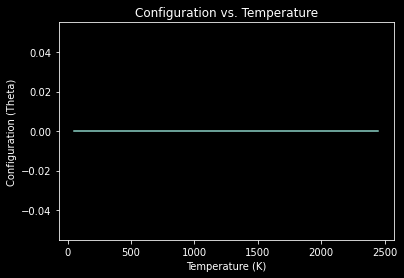

In [101]:
import random

def create_refined_mixed_configuration(structure0, structure180, swap_fraction=0.1):
    """
    Creates a mixed configuration by swapping positions of a fraction of atoms between structure0 and structure180.
    
    Args:
    - structure0: The initial structure corresponding to theta=0.
    - structure180: The structure corresponding to theta=180.
    - swap_fraction: Fraction of atoms to be swapped between the structures.
    
    Returns:
    - mixed_structure: A new structure obtained by swapping positions of atoms.
    """
    
    num_atoms = len(structure0)
    num_swaps = int(swap_fraction * num_atoms)
    
    # Randomly choose atom indices for swapping
    swap_indices = random.sample(range(num_atoms), num_swaps)
    
    # Create a deep copy of structure0 to avoid modifying the original structure
    mixed_structure = structure0.copy()
    
    # Perform the swaps
    for idx in swap_indices:
        mixed_structure[idx].coords = structure180[idx].coords
    
    return mixed_structure

# Create the refined mixed structure
refined_mixed_structure = create_refined_mixed_configuration(structure0, structure180)

# Running the MD and analysis
temperatures = range(50, 2500, 50)
configurations = []

for temp in temperatures:
    final_structure = run_md_at_temperature(refined_mixed_structure, chgnet, temp, 2, "md_mixed", "log_mixed", 100, "cpu")
    final_structure_pymatgen = ase_atoms_to_pymatgen_structure(final_structure)
    config = is_in_configuration(final_structure_pymatgen, structure0, structure180)
    configurations.append(config)

# Visualization
plt.plot(temperatures, configurations)
plt.xlabel('Temperature (K)')
plt.ylabel('Configuration (Theta)')
plt.title('Configuration vs. Temperature')
plt.show()


CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu
CHGNet will run on cpu


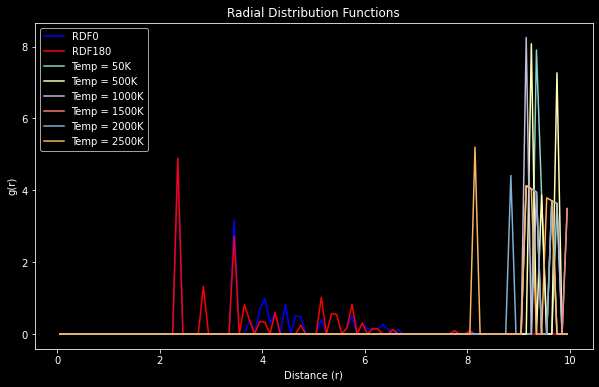

In [109]:
def compute_rdf(structure, rmax=10, n_bins=100):
    """Compute the RDF for a given structure."""
    
    # Check if structure is an ASE Atoms object or a Pymatgen Structure
    if isinstance(structure, Atoms):
        atoms = structure
    else:
        # Convert Pymatgen structure to ASE Atoms
        lattice = structure.lattice.matrix
        atoms = Atoms(
            symbols=[site.species_string for site in structure],
            positions=[site.coords for site in structure],
            cell=lattice
        )
    
    analysis = Analysis(atoms)
    rdf_data = analysis.get_rdf(rmax=rmax, nbins=n_bins, return_dists=True)
    
    r = rdf_data[0][1]  # Extracting distances
    rdf = rdf_data[0][0]  # Extracting rdf values
    
    return r, rdf



rdf_temps = [50, 500, 1000, 1500, 2000, 2500]
rdf_results = []

for temp in rdf_temps:
    final_structure = run_md_at_temperature(refined_mixed_structure, chgnet, temp, 2, "md_mixed", "log_mixed", 100, "cpu")
    _, rdf_temp = compute_rdf(final_structure, rmax=2.5, n_bins=100)

    rdf_results.append(rdf_temp)

rdf0 = np.array(rdf0).ravel()
rdf180 = np.array(rdf180).ravel()

plt.figure(figsize=(10,6))
r, _ = compute_rdf(structure0, rmax=10, n_bins=100)
plt.plot(r, rdf0, label="RDF0", color='blue')
plt.plot(r, rdf180, label="RDF180", color='red')

for i, rdf_temp in enumerate(rdf_results):
    plt.plot(r, rdf_temp, label=f"Temp = {rdf_temps[i]}K")

plt.xlabel("Distance (r)")
plt.ylabel("g(r)")
plt.title("Radial Distribution Functions")
plt.legend()
plt.show()
